In [211]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [213]:
path = '/content/drive/My Drive/Colab Notebooks'

### Load and describe data

In [214]:
df = pd.read_csv(path+'/1081977814_voterfile.csv')
df.head()

,optimus_id,age,party,ethnicity,maritalstatus,dwellingtype,income,education,cd,dma,occupationindustry,vh14p,vh12g,vh12p,vh10g,vh10p,vh08g,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,net_worth,petowner_dog,intrst_nascar_in_hh,intrst_musical_instruments_in_hh,donates_to_liberal_causes,donates_to_conservative_causes,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,Republican,European,Married,Single Family Dwelling Unit,75k-125k,Bach Degree - Extremely Likely,4.0,LAS VEGAS DMA (EST.),Medical,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,$100000-249999,NaN,NaN,NaN,NaN,NaN,Likely Homeowner,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,American Independent,European,NaN,NaN,Unknown,NaN,2.0,RENO DMA (EST.),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,Non-Partisan,European,NaN,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,$250000-499999,NaN,Yes,NaN,NaN,NaN,NaN,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,American Independent,European,Married,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,Democratic,NaN,NaN,NaN,Unknown,NaN,4.0,LAS VEGAS DMA (EST.),NaN,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.71,0.66,0.81,0.19,0.37,0.34


In [215]:
df.drop_duplicates(inplace=True)

In [216]:
df.shape

(48859, 39)

In [217]:
df.describe()

,optimus_id,age,cd,vh14p,vh12g,vh12p,vh10g,vh10p,vh08g,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
count,4.885900e+04,48842.000000,48855.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48859.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,5.531266e+05,51.402850,2.582683,0.087394,0.264025,0.118361,0.431139,0.145050,0.354899,0.178043,0.585337,0.126405,0.508770,0.225670,0.740948,0.153749,0.472891,0.186782,0.620183,0.524167,0.742315,0.134172,0.232513,0.155594
std,3.194070e+05,18.070834,1.071308,0.282415,0.440817,0.323038,0.495240,0.352155,0.478488,0.382553,0.492669,0.332308,0.499928,0.418027,0.438118,0.360711,0.499270,0.389741,0.110712,0.130393,0.093778,0.078538,0.112441,0.085330
min,2.100000e+01,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000
25%,2.775365e+05,36.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,0.430000,0.690000,0.080000,0.150000,0.100000
50%,5.519940e+05,52.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.630000,0.530000,0.750000,0.120000,0.210000,0.130000
75%,8.309615e+05,65.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.700000,0.620000,0.810000,0.170000,0.300000,0.190000
max,1.105934e+06,100.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
df.dtypes

optimus_id                            int64
age                                 float64
party                                object
ethnicity                            object
maritalstatus                        object
dwellingtype                         object
income                               object
education                            object
cd                                  float64
dma                                  object
occupationindustry                   object
vh14p                                 int64
vh12g                                 int64
vh12p                                 int64
vh10g                                 int64
vh10p                                 int64
vh08g                                 int64
vh08p                                 int64
vh06g                                 int64
vh06p                                 int64
vh04g                                 int64
vh04p                                 int64
vh02g                           

### Preprocessing

#### Label Encoding

In [219]:
le = preprocessing.LabelEncoder()
df['party']=le.fit_transform(df['party'])
df['ethnicity']=le.fit_transform(df['ethnicity'])
df['maritalstatus']=le.fit_transform(df['maritalstatus'])
df['dwellingtype']=le.fit_transform(df['dwellingtype'])
df['income']=le.fit_transform(df['income'])
df['education']=le.fit_transform(df['education'])
df['dma']=le.fit_transform(df['dma'])
df['occupationindustry']=le.fit_transform(df['occupationindustry'])
df['home_owner_or_renter']=le.fit_transform(df['home_owner_or_renter'])
df['net_worth']=le.fit_transform(df['net_worth'])

In [220]:
df.dtypes

optimus_id                            int64
age                                 float64
party                                 int64
ethnicity                             int64
maritalstatus                         int64
dwellingtype                          int64
income                                int64
education                             int64
cd                                  float64
dma                                   int64
occupationindustry                    int64
vh14p                                 int64
vh12g                                 int64
vh12p                                 int64
vh10g                                 int64
vh10p                                 int64
vh08g                                 int64
vh08p                                 int64
vh06g                                 int64
vh06p                                 int64
vh04g                                 int64
vh04p                                 int64
vh02g                           

#### Remove rows with all unique values

In [221]:
df.nunique()

optimus_id                          48859
age                                    82
party                                   8
ethnicity                               6
maritalstatus                           3
dwellingtype                            4
income                                  6
education                              12
cd                                      4
dma                                     4
occupationindustry                     19
vh14p                                   2
vh12g                                   2
vh12p                                   2
vh10g                                   2
vh10p                                   2
vh08g                                   2
vh08p                                   2
vh06g                                   2
vh06p                                   2
vh04g                                   2
vh04p                                   2
vh02g                                   2
vh02p                             

In [222]:
df.drop(columns=['optimus_id'], inplace = True)

#### Remove Columns with more than 80% missing data

In [223]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing = percent_missing
missing

age                                  0.034794
party                                0.000000
ethnicity                            0.000000
maritalstatus                        0.000000
dwellingtype                         0.000000
income                               0.000000
education                            0.000000
cd                                   0.008187
dma                                  0.000000
occupationindustry                   0.000000
vh14p                                0.000000
vh12g                                0.000000
vh12p                                0.000000
vh10g                                0.000000
vh10p                                0.000000
vh08g                                0.000000
vh08p                                0.000000
vh06g                                0.000000
vh06p                                0.000000
vh04g                                0.000000
vh04p                                0.000000
vh02g                             

In [224]:
cols = missing_value_df[missing_value_df['percent_missing']>80]
cols = list(cols['column_name'])
df.drop(columns = cols, inplace = True)

In [225]:
missing = df.isnull().sum() * 100 / len(df)
missing

age                     0.034794
party                   0.000000
ethnicity               0.000000
maritalstatus           0.000000
dwellingtype            0.000000
income                  0.000000
education               0.000000
cd                      0.008187
dma                     0.000000
occupationindustry      0.000000
vh14p                   0.000000
vh12g                   0.000000
vh12p                   0.000000
vh10g                   0.000000
vh10p                   0.000000
vh08g                   0.000000
vh08p                   0.000000
vh06g                   0.000000
vh06p                   0.000000
vh04g                   0.000000
vh04p                   0.000000
vh02g                   0.000000
vh02p                   0.000000
vh00g                   0.000000
vh00p                   0.000000
net_worth               0.000000
home_owner_or_renter    0.000000
g08_precinct_turnout    0.002047
g10_precinct_turnout    0.002047
g12_precinct_turnout    0.002047
p08_precin

#### Fill NaN values

In [226]:
df.ffill(inplace=True)

In [227]:
df.isnull().sum()

age                     0
party                   0
ethnicity               0
maritalstatus           0
dwellingtype            0
income                  0
education               0
cd                      0
dma                     0
occupationindustry      0
vh14p                   0
vh12g                   0
vh12p                   0
vh10g                   0
vh10p                   0
vh08g                   0
vh08p                   0
vh06g                   0
vh06p                   0
vh04g                   0
vh04p                   0
vh02g                   0
vh02p                   0
vh00g                   0
vh00p                   0
net_worth               0
home_owner_or_renter    0
g08_precinct_turnout    0
g10_precinct_turnout    0
g12_precinct_turnout    0
p08_precinct_turnout    0
p10_precinct_turnout    0
p12_precinct_turnout    0
dtype: int64

#### Prep for analysis

From the vote turnout, we deduce the probability of a voter being present to vote across all mentioned elections in the dataset. This probability will be the target variable, and is added under the column named 'vote'

In [228]:
df['vote'] = (df['vh14p'] + df['vh12g'] + df['vh12p'] + df['vh10g'] + df['vh10p'] + df['vh08g'] + df['vh08p'] + df['vh06g'] + df['vh06p'] + df['vh04g'] + df['vh04p'] + df['vh02g'] + df['vh02p'] + df['vh00g'] + df['vh00p'])/15

In [229]:
df['vote']

0        0.400000
1        0.000000
2        0.133333
3        0.000000
4        0.733333
           ...   
49995    0.066667
49996    0.066667
49997    0.066667
49998    0.533333
49999    0.000000
Name: vote, Length: 48859, dtype: float64

#### Correlation Analysis

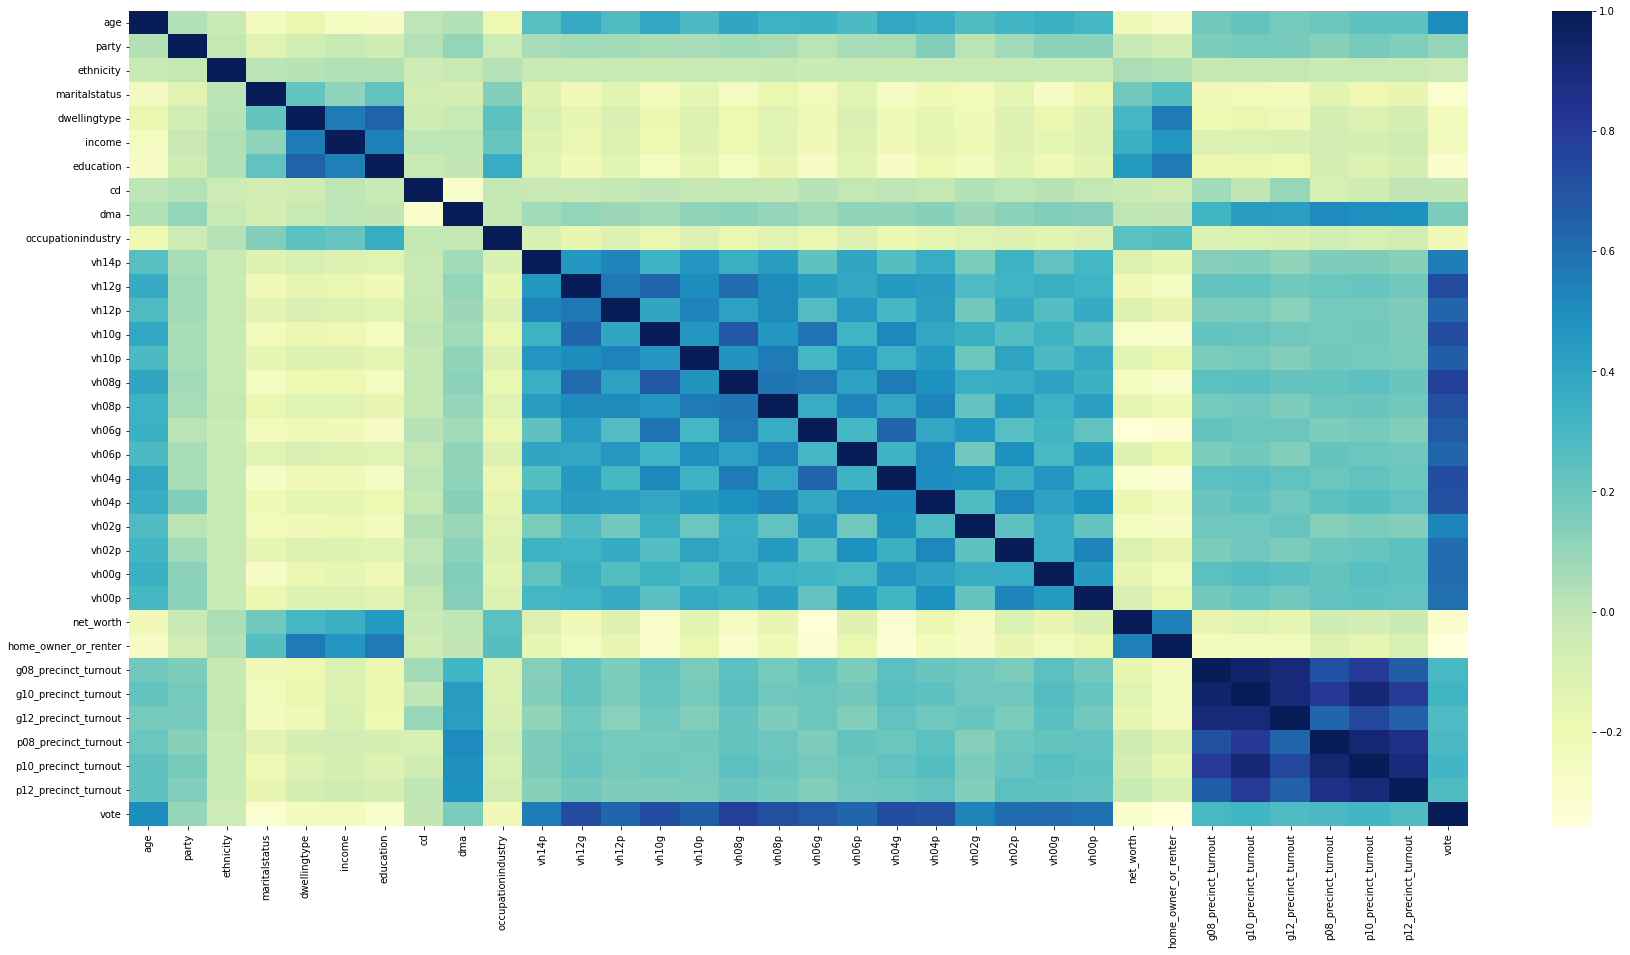

In [230]:
plt.figure(figsize = (30, 15))
x = sns.heatmap(df.corr(), cmap = 'YlGnBu')

In [231]:
a = pd.DataFrame(df.corr()['vote'])
a.drop('vote',inplace=True)

col = a[(a['vote'] > -0.25) & (a['vote'] < 0.25)].index

Removing columns with no insignificant correlation values with 'vote' column

In [232]:
col=list(col)
df.drop(columns = col, inplace = True)

### Scale and Train-Test Split Data

Split the data into 75% training and 25% testing sub-dataframes

In [233]:
y = df.vote.values
y

array([0.4       , 0.        , 0.13333333, ..., 0.06666667, 0.53333333,
       0.        ])

In [234]:
x = df.drop("vote", axis=1)
cols = x.columns
x

,age,maritalstatus,education,vh14p,vh12g,vh12p,vh10g,vh10p,vh08g,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,net_worth,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,69.0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,2,0,0.56,0.54,0.75,0.17,0.32,0.24
1,20.0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,0.84,0.82,0.92,0.47,0.62,0.47
2,28.0,2,11,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4,2,0.49,0.34,0.70,0.04,0.09,0.06
3,78.0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,0.84,0.79,0.91,0.24,0.46,0.30
4,68.0,2,11,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,8,2,0.71,0.66,0.81,0.19,0.37,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23.0,2,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,0,0.68,0.56,0.77,0.12,0.22,0.12
49996,24.0,2,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,0,0.50,0.38,0.67,0.05,0.09,0.06
49997,28.0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,2,0.45,0.31,0.58,0.07,0.10,0.08
49998,49.0,2,4,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,4,2,0.52,0.35,0.68,0.06,0.10,0.06


In [235]:
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(x))
X.columns = cols

In [236]:
X.head()

,age,maritalstatus,education,vh14p,vh12g,vh12p,vh10g,vh10p,vh08g,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,net_worth,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,0.617284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.25,0.0,0.56,0.54,0.642857,0.17,0.32,0.24
1,0.012346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,0.84,0.82,0.885714,0.47,0.62,0.47
2,0.111111,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50,1.0,0.49,0.34,0.571429,0.04,0.09,0.06
3,0.728395,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,0.84,0.79,0.871429,0.24,0.46,0.30
4,0.604938,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.71,0.66,0.728571,0.19,0.37,0.34


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 5)

### Regression Model

In [238]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [239]:
y_predicted = linreg.predict(X_test)

In [240]:
y_predicted[y_predicted<0]=0

### Model Evaluation 

In [241]:
rmse = mean_squared_error(y_test, y_predicted)
rmse

2.6972293319484306e-32

In [242]:
r2 = r2_score(y_test, y_predicted)
r2

1.0

### Writing Predicted Data into CSV file

In [243]:
df2 = X_test
df2['vote_prob'] = y_predicted
df2

,age,maritalstatus,education,vh14p,vh12g,vh12p,vh10g,vh10p,vh08g,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,net_worth,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout,vote_prob
31707,0.456790,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000,1.0,0.39,0.27,0.328571,0.05,0.09,0.07,0.133333
5799,0.703704,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.625,0.0,0.67,0.53,0.671429,0.09,0.17,0.11,0.133333
46721,0.925926,1.0,1.000000,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.375,1.0,0.75,0.65,0.800000,0.16,0.30,0.18,0.600000
20051,0.543210,0.5,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.000,1.0,0.63,0.56,0.728571,0.11,0.23,0.15,0.333333
10940,0.296296,0.5,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.250,0.0,0.64,0.52,0.671429,0.10,0.18,0.12,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31803,0.703704,1.0,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.250,0.0,0.73,0.62,0.728571,0.18,0.29,0.18,0.133333
32642,0.530864,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000,1.0,0.68,0.62,0.571429,0.19,0.41,0.26,0.200000
24993,0.234568,1.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250,0.0,0.52,0.35,0.528571,0.05,0.08,0.07,0.066667
44035,0.024691,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000,1.0,0.56,0.51,0.585714,0.13,0.24,0.17,0.000000


In [244]:
df2.to_csv('predicted.csv')
!cp predicted.csv "drive/My Drive/Colab Notebooks"